In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *
import imageio

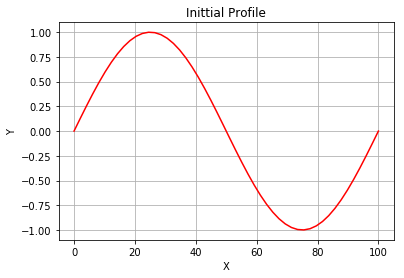

In [2]:
x_o = 0                           ## Limites del espacio-tiempo 
L = 100

a_t = 0                         
b_t = 40

n = 50                         ## Numero de particiones
    
def f(n):

     x = np.zeros(n) 
     t = np.zeros(n)
     dx = (L-x_o)/(n-1)                ## Malla en el espacio
     dt = (b_t-a_t)/(n-1)                ## Malla en el tiempo


     for i in range(0,n):
         x[i] = x_o + dx*i                     ## Posicion
         t[i] = a_t + dt*i                     ## Tiempo
            
     f = np.sin((2*pi*x)/L)
     return x,f,t

plt.grid()                                       ## Perfil Inicial
plt.title('Inittial Profile',)

plt.xlabel('X')
plt.ylabel('Y')
plt.plot(f(n)[0],f(n)[1],'r')

In [3]:
def g(f):                            ## Metodo FCTS                    ## j: Time    i: Position
    
   u = np.zeros((n,n))                 ## Propagacion   
   dx = (L-x_o)/(n-1)                ## Malla en el espacio
   dt = (b_t-a_t)/(n-1)                ## Malla en el tiempo
                       ## Error
   
   u[:,0] = f
                         ## Valor Maximo de la funcion
   for j in range(0,n-1):         ## Columna                            
       for i in range(1,n-1):                ## Espacio
            
           u[i][j+1] = (u[i][j]) - (dt/(2*dx))*(u[i][j] - u[i-1][j])*(u[i][j])
   return u    

In [4]:
def gif(x,u,s):  ## Estoy generando las n imagenes para el gif  
    
    filenames = []        ## x:Posicion   u: Posicion en el tiempo   s: Tiempo  r: Perfil inicial  
    for i in range(0,s):
        
        plt.xlabel('Position')
        plt.ylabel('Function')
        plt.plot(x,u[:,i], label = 't =' + str(i))
        plt.legend((['t =' +str(round((f(s)[2])[i],3))+'s']),prop = {'size':10}, loc = 'lower center')
        plt.savefig(str(i)+'.png')
        filenames += [str(i)+'.png']
        
    images = []                     ## Estoy uniendo las imagenes para el gif 

    for filename in filenames:
        images.append(imageio.imread(str(filename)))
    imageio.mimsave('movie.gif',images,duration = 0.5)

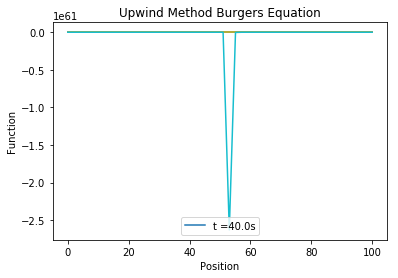

In [6]:
plt.title('Upwind Method Burgers Equation',)        
gif(f(n)[0],g(f(n)[1]),50)

In [7]:
x_1 = 0.0                          ## Limites del espacio-tiempo 
x_2 = 1.0


n1 = 50                         ## Numero de particiones
    
def f1(n):
     
     f1 = np.zeros(n)
     x = np.zeros(n) 
     t = np.zeros(n)
    
     dx = (x_2-x_1)/(n-1)                ## Malla en el espacio
     dt = (b_t-a_t)/(n-1)                ## Malla en el tiempo


     for i in range(0,n):
         x[i] = x_1 + dx*i                     ## Posicion
         t[i] = a_t + dt*i                     ## Tiempo
            
         if x[i] <= 0.5:
            f1[i] = 1
         else:
            f1[i] = 2
     return x,f1,t

In [ ]:
plt.title('Upwind Method Burgers Equation',)        
gif(f1(n1)[0],g(f1(n1)[1]),50)